In [1]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
vehicle_df = pd.read_csv(Path('./VEHICLE.csv'))

/var/folders/_9/k8qj85q9101b4nrg3qh4f1wr0000gn/T/ipykernel_1233/491426976.py:1: DtypeWarning: Columns (3,25,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(Path('./VEHICLE.csv'))


In [3]:
# identify the number of rows and columns in the DataFrame
vehicle_df.shape

(365242, 38)

In [4]:
# preview the DataFrame to ensure data has been loaded correctly
vehicle_df.head()

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,Road Surface Type Desc,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,...,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,OWNER_POSTCODE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,Traffic Control Desc
0,T20060000010,A,1996.0,2,SW,1,Paved,V,SEDAN,MITSUB,...,MRN,ZZ,2,F,2,3,3130.0,1,1,Stop-go lights
1,T20060000010,B,2003.0,1,NW,1,Paved,V,COUPE,UNKN,...,BLU,ZZ,2,2,2,3,3977.0,1,1,Stop-go lights
2,T20060000010,C,2001.0,8,NW,1,Paved,V,SEDAN,FORD,...,YLW,ZZ,2,F,2,2,3804.0,2,1,Stop-go lights
3,T20060000018,A,1998.0,2,S,1,Paved,V,DC UTE,TOYOTA,...,GRY,ZZ,2,9,0,3,3175.0,1,0,No control
4,T20060000018,B,1991.0,1,N,1,Paved,V,SEDAN,SUBARU,...,BLU,ZZ,2,F,0,5,3805.0,1,11,Giveway sign


In [5]:
# identify the number of records in the DF v no of rows in the original
vehicle_df.count()

ACCIDENT_NO               365242
VEHICLE_ID                365242
VEHICLE_YEAR_MANUF        342384
VEHICLE_DCA_CODE          365242
INITIAL_DIRECTION         365242
ROAD_SURFACE_TYPE         365242
Road Surface Type Desc    365242
REG_STATE                 365242
VEHICLE_BODY_STYLE        365242
VEHICLE_MAKE              365242
VEHICLE_MODEL             365242
VEHICLE_POWER                  2
VEHICLE_TYPE              365242
Vehicle Type Desc         365242
VEHICLE_WEIGHT             46159
CONSTRUCTION_TYPE         365242
FUEL_TYPE                 365242
NO_OF_WHEELS              294157
NO_OF_CYLINDERS           301994
SEATING_CAPACITY          279942
TARE_WEIGHT               324512
TOTAL_NO_OCCUPANTS        365235
CARRY_CAPACITY             70394
CUBIC_CAPACITY             43322
FINAL_DIRECTION           365242
DRIVER_INTENT             365242
VEHICLE_MOVEMENT          365242
TRAILER_TYPE              365242
VEHICLE_COLOUR_1          365242
VEHICLE_COLOUR_2          365242
CAUGHT_FIR

In [6]:
# subsetting DataFrame

In [7]:
# Filter the DataFrame down to the desired columns, keep all rows
vehicle_df = vehicle_df.iloc[:, [0,2,8,9,28,33]]

In [8]:
vehicle_df.head()

,ACCIDENT_NO,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,VEHICLE_COLOUR_1,LEVEL_OF_DAMAGE
0,T20060000010,1996.0,SEDAN,MITSUB,MRN,3
1,T20060000010,2003.0,COUPE,UNKN,BLU,3
2,T20060000010,2001.0,SEDAN,FORD,YLW,2
3,T20060000018,1998.0,DC UTE,TOYOTA,GRY,3
4,T20060000018,1991.0,SEDAN,SUBARU,BLU,5


In [9]:
vehicle_df.dtypes

ACCIDENT_NO            object
VEHICLE_YEAR_MANUF    float64
VEHICLE_BODY_STYLE     object
VEHICLE_MAKE           object
VEHICLE_COLOUR_1       object
LEVEL_OF_DAMAGE         int64
dtype: object

In [10]:
# drop rows with any zero or null values in any column
vehicle_df = vehicle_df.dropna(how='any')

In [11]:
# convert year into int
vehicle_df = vehicle_df.astype({'VEHICLE_YEAR_MANUF':'int'})

In [12]:
vehicle_df.isnull().mean()* 100

ACCIDENT_NO           0.0
VEHICLE_YEAR_MANUF    0.0
VEHICLE_BODY_STYLE    0.0
VEHICLE_MAKE          0.0
VEHICLE_COLOUR_1      0.0
LEVEL_OF_DAMAGE       0.0
dtype: float64

In [13]:
vehicle_df.columns

Index(['ACCIDENT_NO', 'VEHICLE_YEAR_MANUF', 'VEHICLE_BODY_STYLE',
       'VEHICLE_MAKE', 'VEHICLE_COLOUR_1', 'LEVEL_OF_DAMAGE'],
      dtype='object')

In [14]:
# convert accident_no into year:
vehicle_df['YEAR'] = vehicle_df['ACCIDENT_NO'].apply(lambda x: x[1:5])

In [15]:
vehicle_df['YEAR']= pd.to_datetime(vehicle_df['YEAR'])
vehicle_df['YEAR']

0        2006-01-01
1        2006-01-01
2        2006-01-01
3        2006-01-01
4        2006-01-01
            ...    
365237   2020-01-01
365238   2020-01-01
365239   2020-01-01
365240   2020-01-01
365241   2020-01-01
Name: YEAR, Length: 342384, dtype: datetime64[ns]

In [16]:
# display(vehicle_df['VEHICLE_BODY_STYLE'].unique())

In [17]:
# vehicle_df.plot()

In [18]:
vehicle_df.set_index('ACCIDENT_NO', inplace=True)
vehicle_df

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,VEHICLE_COLOUR_1,LEVEL_OF_DAMAGE,YEAR
ACCIDENT_NO,,,,,,
T20060000010,1996,SEDAN,MITSUB,MRN,3,2006-01-01
T20060000010,2003,COUPE,UNKN,BLU,3,2006-01-01
T20060000010,2001,SEDAN,FORD,YLW,2,2006-01-01
T20060000018,1998,DC UTE,TOYOTA,GRY,3,2006-01-01
T20060000018,1991,SEDAN,SUBARU,BLU,5,2006-01-01
...,...,...,...,...,...,...
T20200019247,2006,SEDAN,VOLKS,BLU,5,2020-01-01
T20200019250,2007,SEDAN,VOLKS,BLU,1,2020-01-01
T20200019250,2007,SOLO,YAMAHA,BLK,1,2020-01-01


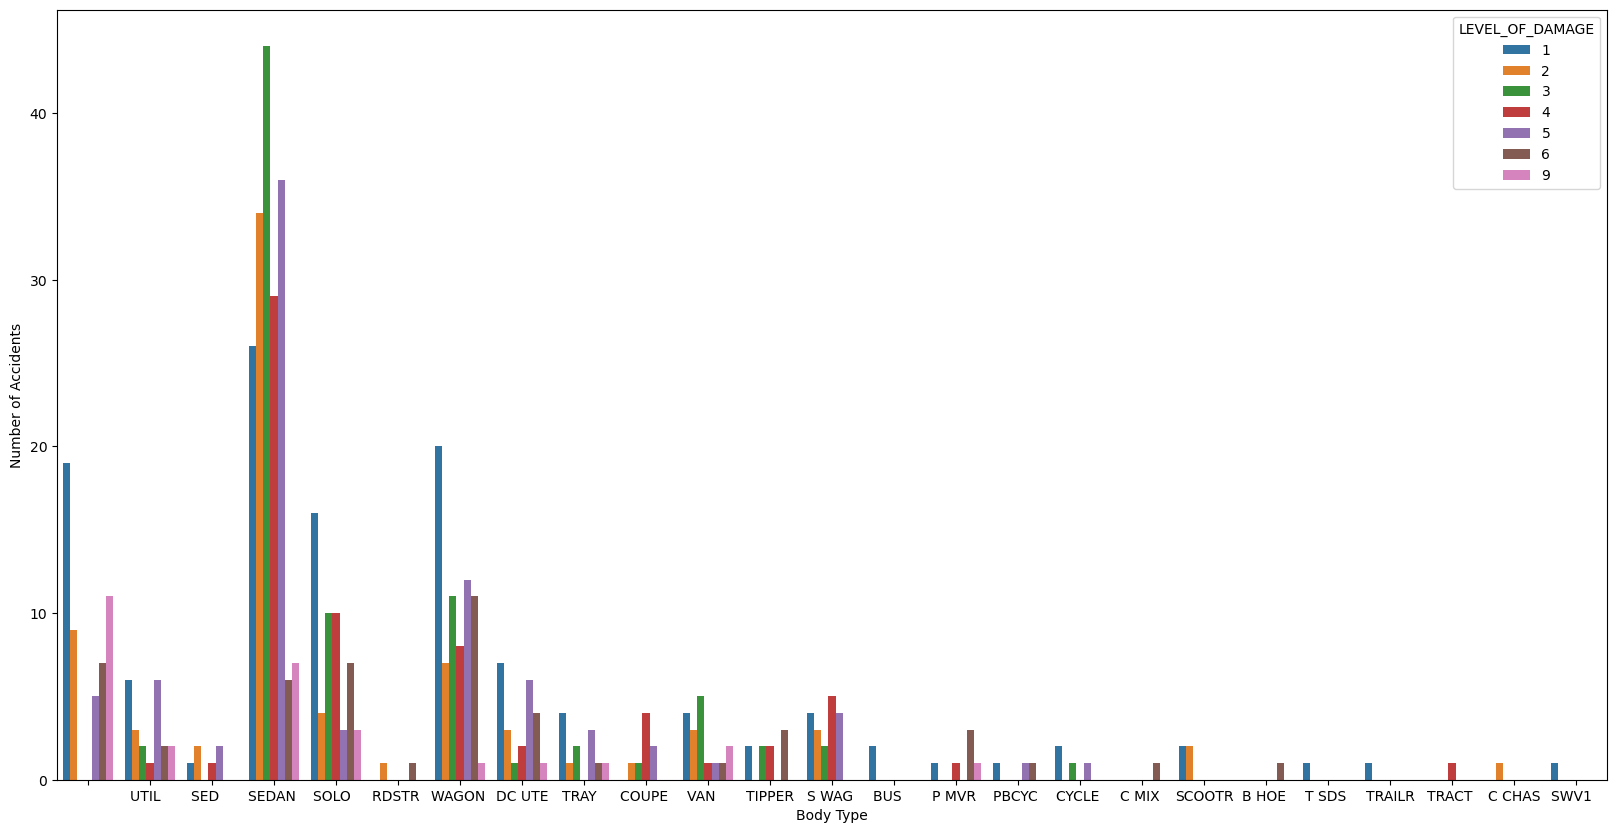

In [19]:
# Create a bar plot for body types
plt.figure(figsize=(20, 10))
sns.countplot(data=vehicle_df.tail(500), x='VEHICLE_BODY_STYLE', hue='LEVEL_OF_DAMAGE')
plt.xlabel('Body Type')
plt.ylabel('Number of Accidents')
plt.legend(title='LEVEL_OF_DAMAGE')
plt.show()

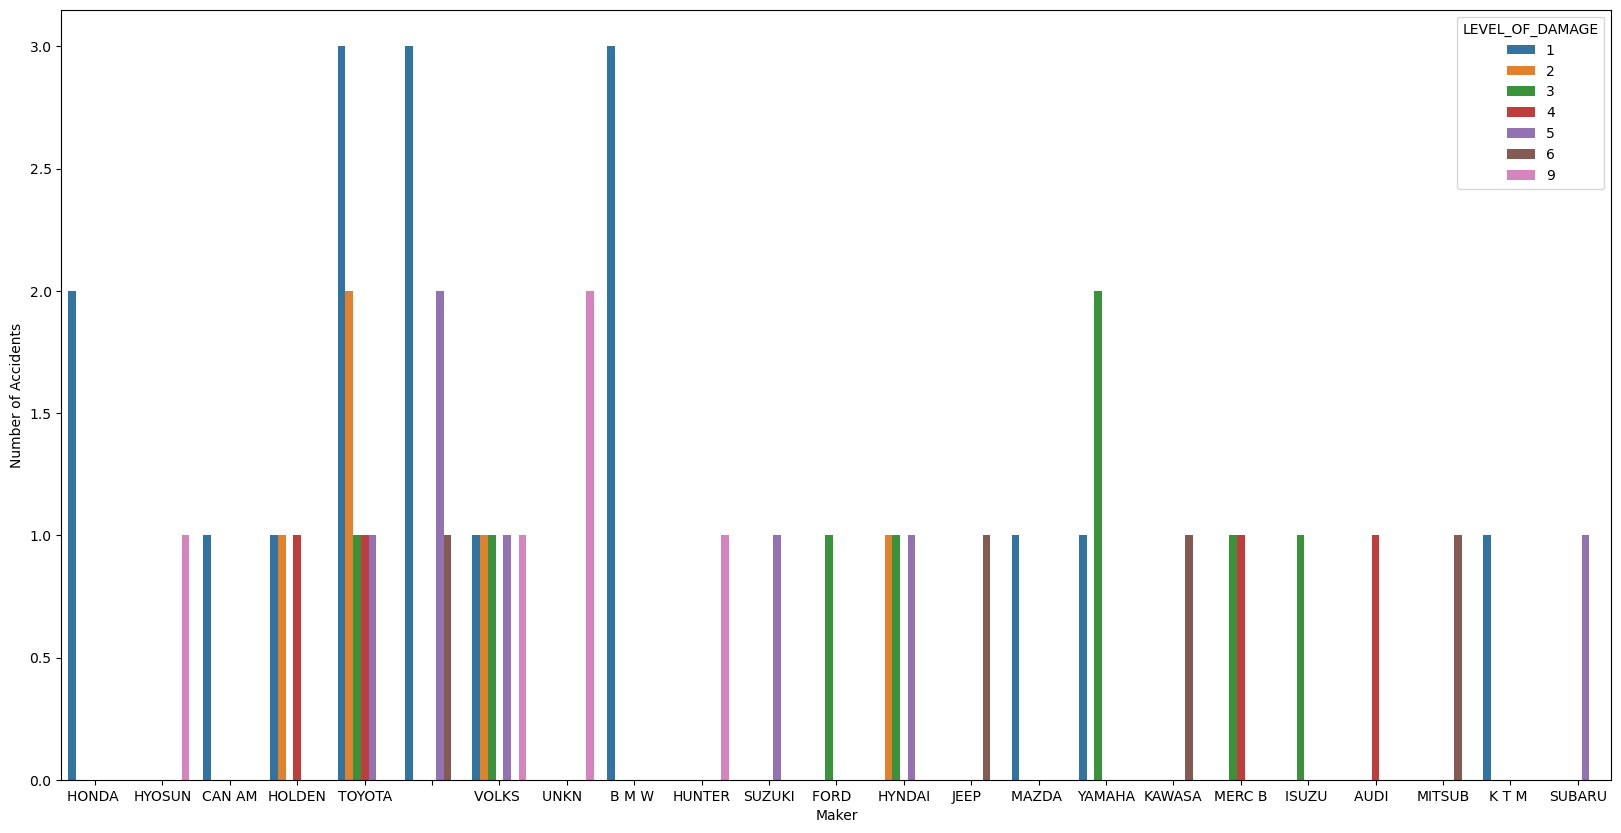

In [30]:
# Create a bar plot for car maker
plt.figure(figsize=(20, 10))
sns.countplot(data=vehicle_df.tail(50), x='VEHICLE_MAKE', hue = 'LEVEL_OF_DAMAGE')
plt.xlabel('Maker')
plt.ylabel('Number of Accidents')
plt.legend(title='LEVEL_OF_DAMAGE')
plt.show()

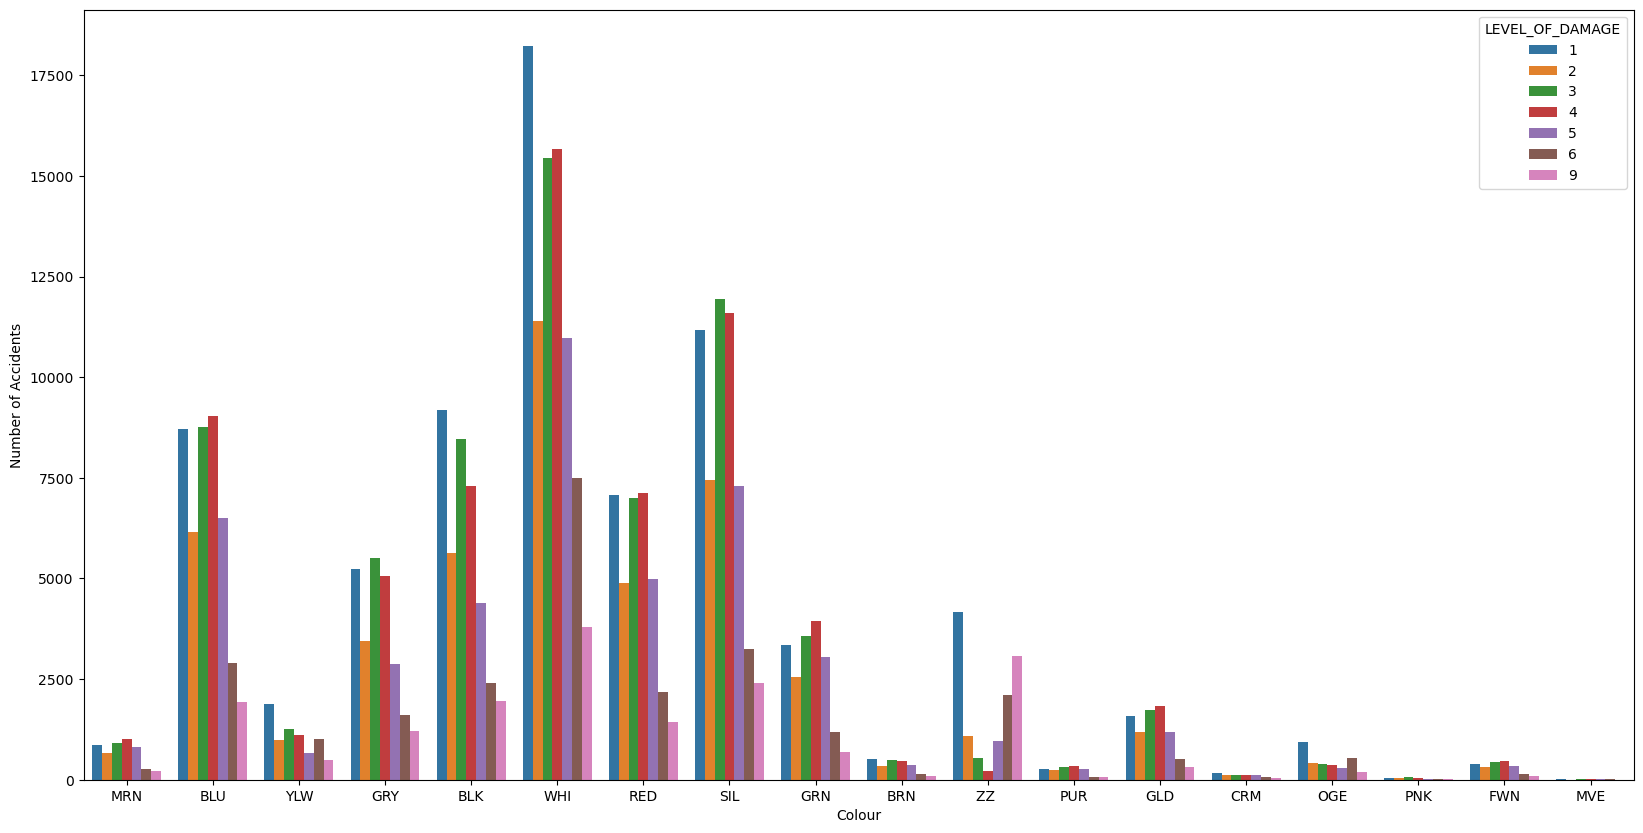

In [21]:
# Create a bar plot for body colour
plt.figure(figsize=(20, 10))
sns.countplot(data=vehicle_df, x='VEHICLE_COLOUR_1', hue = 'LEVEL_OF_DAMAGE')
plt.xlabel('Colour')
plt.ylabel('Number of Accidents')
plt.legend(title='LEVEL_OF_DAMAGE')
plt.show()

In [22]:
# display(vehicle_df['VEHICLE_MAKE'].unique())

In [23]:
# display(vehicle_df['VEHICLE_YEAR_MANUF'].unique())

In [25]:
# make DataFrame Pipeline Interactive
# interactive_vehicle_df = vehicle_df.interactive()

In [26]:
#define panel widgets
# accident_year_slider = pn.widgets.IntSlider(name = 'accident_year_slider', start=2006, end=2020, step=1, value = 2000)

In [27]:
# accident_year_slider